## Introduction

The top 5 most populated states in the USA are California, Texas, Florida, New York, and Pennsylvania. According to recent data, California and Texas are among the most polluted states in the country. California, in particular, has cities like Los Angeles and Bakersfield that rank high in pollution levels due to factors like vehicle emissions and industrial activities. Texas also faces significant pollution challenges, especially in urban areas.

Air pollution has a direct impact on respiratory health. Exposure to pollutants like particulate matter (PM2.5) and ozone can lead to respiratory conditions such as asthma, chronic bronchitis, and other chronic obstructive pulmonary diseases. Long-term exposure can also increase the risk of lung cancer and cardiovascular diseases. Children, the elderly, and those with pre-existing health conditions are particularly vulnerable.

The cost of treating respiratory conditions can vary significantly across states due to differences in healthcare systems, insurance coverage, and local healthcare costs. Generally, states with higher population may have higher pollution which increases the prevalence of respiratory cases.
With this study I am trying to understand are these facts true. 

### Importing Packages

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Reading the data files 

In [4]:
file_2018 = pd.read_csv('data/Medicare_OP_Hospitals_by_Provider_and_Service_2018.csv', encoding='unicode_escape')
file_2019 = pd.read_csv('data/Medicare_OP_Hospitals_by_Provider_and_Service_2019.csv', encoding='unicode_escape')
file_2020= pd.read_csv('data/Medicare_OP_Hospitals_by_Provider_and_Service_2020.csv', encoding='unicode_escape')
file_2021= pd.read_csv('data/Medicare_OP_Hospitals_by_Provider_and_Service_2021.csv', encoding='unicode_escape')
file_2022= pd.read_csv('data/Medicare_OP_Hospitals_by_Provider_and_Service_2022.csv', encoding='unicode_escape')

### Adding the year column

In [5]:
file_2018['year']='2018'
file_2019['year']='2019'
file_2020['year']='2020'
file_2021['year']='2021'
file_2022['year']='2022'

### Creating one master data table

In [6]:
out_patient_2018_to_2022 = pd.concat([file_2018,file_2019,file_2020,file_2021,file_2022])

### Performing EDA

In [7]:
out_patient_2018_to_2022.head()

,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_St,Rndrng_Prvdr_City,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,APC_Cd,APC_Desc,Bene_Cnt,CAPC_Srvcs,Avg_Tot_Sbmtd_Chrgs,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Outlier_Srvcs,Avg_Mdcr_Outlier_Amt,year
0,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,248.0,262.0,10383.749695,1140.883626,908.563740,NaN,NaN,2018
1,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,5073,Level 3 Excision/ Biopsy/ Incision and Drainage,31.0,35.0,17145.795143,1937.482857,1535.272857,NaN,NaN,2018
2,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,5091,Level 1 Breast/Lymphatic Surgery and Related P...,23.0,23.0,11134.422609,2321.830000,1849.910000,0.0,0.0,2018
3,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,5092,Level 2 Breast/Lymphatic Surgery and Related P...,44.0,44.0,16885.491591,4095.680000,3263.220000,0.0,0.0,2018
4,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,5112,Level 2 Musculoskeletal Procedures,20.0,20.0,11335.048000,1103.246000,869.706000,0.0,0.0,2018


In [8]:
out_patient_2018_to_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577297 entries, 0 to 116458
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Rndrng_Prvdr_CCN           577297 non-null  int64  
 1   Rndrng_Prvdr_Org_Name      577297 non-null  object 
 2   Rndrng_Prvdr_St            577297 non-null  object 
 3   Rndrng_Prvdr_City          577297 non-null  object 
 4   Rndrng_Prvdr_State_Abrvtn  577297 non-null  object 
 5   Rndrng_Prvdr_State_FIPS    577297 non-null  int64  
 6   Rndrng_Prvdr_Zip5          577297 non-null  int64  
 7   Rndrng_Prvdr_RUCA          576976 non-null  float64
 8   Rndrng_Prvdr_RUCA_Desc     576976 non-null  object 
 9   APC_Cd                     577297 non-null  int64  
 10  APC_Desc                   577297 non-null  object 
 11  Bene_Cnt                   311431 non-null  float64
 12  CAPC_Srvcs                 316993 non-null  float64
 13  Avg_Tot_Sbmtd_Chrgs        316989 

In [9]:
out_patient_2018_to_2022.isnull().sum()

Rndrng_Prvdr_CCN                  0
Rndrng_Prvdr_Org_Name             0
Rndrng_Prvdr_St                   0
Rndrng_Prvdr_City                 0
Rndrng_Prvdr_State_Abrvtn         0
Rndrng_Prvdr_State_FIPS           0
Rndrng_Prvdr_Zip5                 0
Rndrng_Prvdr_RUCA               321
Rndrng_Prvdr_RUCA_Desc          321
APC_Cd                            0
APC_Desc                          0
Bene_Cnt                     265866
CAPC_Srvcs                   260304
Avg_Tot_Sbmtd_Chrgs          260308
Avg_Mdcr_Alowd_Amt           260308
Avg_Mdcr_Pymt_Amt            260308
Outlier_Srvcs                358760
Avg_Mdcr_Outlier_Amt         358760
year                              0
dtype: int64

In [10]:
out_patient_2018_to_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577297 entries, 0 to 116458
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Rndrng_Prvdr_CCN           577297 non-null  int64  
 1   Rndrng_Prvdr_Org_Name      577297 non-null  object 
 2   Rndrng_Prvdr_St            577297 non-null  object 
 3   Rndrng_Prvdr_City          577297 non-null  object 
 4   Rndrng_Prvdr_State_Abrvtn  577297 non-null  object 
 5   Rndrng_Prvdr_State_FIPS    577297 non-null  int64  
 6   Rndrng_Prvdr_Zip5          577297 non-null  int64  
 7   Rndrng_Prvdr_RUCA          576976 non-null  float64
 8   Rndrng_Prvdr_RUCA_Desc     576976 non-null  object 
 9   APC_Cd                     577297 non-null  int64  
 10  APC_Desc                   577297 non-null  object 
 11  Bene_Cnt                   311431 non-null  float64
 12  CAPC_Srvcs                 316993 non-null  float64
 13  Avg_Tot_Sbmtd_Chrgs        316989 

### Dropping unnecessary columns 

In [11]:
out_patient_2018_to_2022 = out_patient_2018_to_2022[['Rndrng_Prvdr_City','Rndrng_Prvdr_State_Abrvtn','APC_Cd','APC_Desc','Bene_Cnt','Avg_Tot_Sbmtd_Chrgs','year']]

In [12]:
out_patient_2018_to_2022

,Rndrng_Prvdr_City,Rndrng_Prvdr_State_Abrvtn,APC_Cd,APC_Desc,Bene_Cnt,Avg_Tot_Sbmtd_Chrgs,year
0,Dothan,AL,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,248.0,10383.749695,2018
1,Dothan,AL,5073,Level 3 Excision/ Biopsy/ Incision and Drainage,31.0,17145.795143,2018
2,Dothan,AL,5091,Level 1 Breast/Lymphatic Surgery and Related P...,23.0,11134.422609,2018
3,Dothan,AL,5092,Level 2 Breast/Lymphatic Surgery and Related P...,44.0,16885.491591,2018
4,Dothan,AL,5112,Level 2 Musculoskeletal Procedures,20.0,11335.048000,2018
...,...,...,...,...,...,...,...
116454,Sachse,TX,8011,Comprehensive Observation Services,22.0,11494.859130,2022
116455,Katy,TX,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,NaN,NaN,2022
116456,Lakeway,TX,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,NaN,6060.954286,2022
116457,Corpus Christi,TX,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,NaN,NaN,2022


### Renaming the columns

In [13]:
out_patient_2018_to_2022 = out_patient_2018_to_2022.rename(columns={'Rndrng_Prvdr_City':'city','Rndrng_Prvdr_State_Abrvtn':'state','APC_Cd':'disease_code','APC_Desc':'treatment','Bene_Cnt':'patient','Avg_Tot_Sbmtd_Chrgs':'cost'})

In [14]:
out_patient_2018_to_2022['treatment'].nunique()

69

In [15]:
out_patient_2018_to_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577297 entries, 0 to 116458
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   city          577297 non-null  object 
 1   state         577297 non-null  object 
 2   disease_code  577297 non-null  int64  
 3   treatment     577297 non-null  object 
 4   patient       311431 non-null  float64
 5   cost          316989 non-null  float64
 6   year          577297 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 35.2+ MB


In [16]:
out_patient_2018_to_2022 = out_patient_2018_to_2022.dropna()

In [17]:
out_patient_2018_to_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311431 entries, 0 to 116454
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   city          311431 non-null  object 
 1   state         311431 non-null  object 
 2   disease_code  311431 non-null  int64  
 3   treatment     311431 non-null  object 
 4   patient       311431 non-null  float64
 5   cost          311431 non-null  float64
 6   year          311431 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 19.0+ MB


In [18]:
out_patient_2018_to_2022= out_patient_2018_to_2022[['state','treatment','patient','cost','year']].groupby(['year','state','treatment']).sum().reset_index()

In [19]:
out_patient_2018_to_2022['treatment'] = out_patient_2018_to_2022['treatment'].str.lower()

In [20]:
out_patient_2018_to_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13895 entries, 0 to 13894
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       13895 non-null  object 
 1   state      13895 non-null  object 
 2   treatment  13895 non-null  object 
 3   patient    13895 non-null  float64
 4   cost       13895 non-null  float64
dtypes: float64(2), object(3)
memory usage: 542.9+ KB


In [21]:
out_patient_2018_to_2022.head()

,year,state,treatment,patient,cost
0,2018,AK,abdominal/peritoneal/biliary and related proce...,176.0,80235.588438
1,2018,AK,complex gi procedures,15.0,21323.068000
2,2018,AK,comprehensive observation services,1333.0,116186.323218
3,2018,AK,implantation of drug infusion device,24.0,152708.150000
4,2018,AK,level 1 breast/lymphatic surgery and related p...,62.0,56890.387454


In [22]:
out_patient_2018_to_2022

,year,state,treatment,patient,cost
0,2018,AK,abdominal/peritoneal/biliary and related proce...,176.0,80235.588438
1,2018,AK,complex gi procedures,15.0,21323.068000
2,2018,AK,comprehensive observation services,1333.0,116186.323218
3,2018,AK,implantation of drug infusion device,24.0,152708.150000
4,2018,AK,level 1 breast/lymphatic surgery and related p...,62.0,56890.387454
...,...,...,...,...,...
13890,2022,WY,level 5 ent procedures,17.0,20262.110000
13891,2022,WY,level 5 musculoskeletal procedures,1067.0,592234.999486
13892,2022,WY,level 5 neurostimulator and related procedures,33.0,183014.194357
13893,2022,WY,level 5 urology and related services,398.0,132763.913450


In [41]:
out_patient_2018_to_2022.to_csv("Medicare_outpatient_exported_file.csv")

## Plotting Visuals

I am plotting this graph to see the number of cases reported in USA for the year 2018 to 2022.

### Plotting to know total no of cases trend for 5 years 

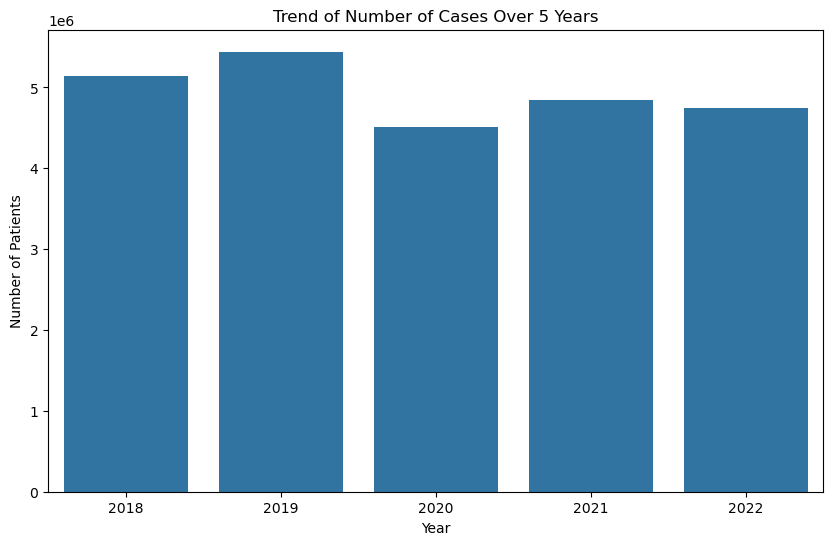

In [23]:
yearly_cases = out_patient_2018_to_2022.groupby('year')['patient'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='patient', data=yearly_cases)
plt.xlabel('Year')
plt.ylabel('Number of Patients')
plt.title('Trend of Number of Cases Over 5 Years')
plt.show()


I see there is a slight dip in the number of cases in 2020 otherwise the overall disease condition seems growing year on year in US.

### Plotting to know treatment cost spent for 5 years 

Lets take a look at te coSt of the treatment for the year 2018 to 2022 in USA.

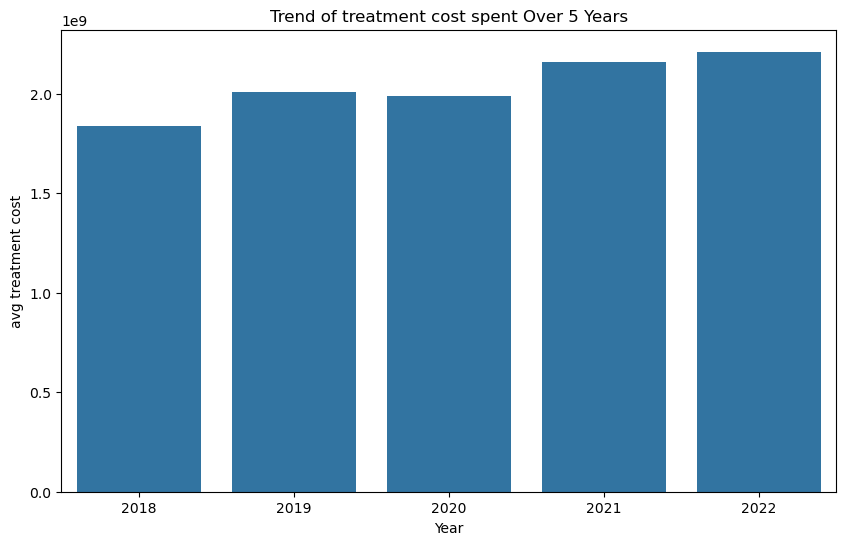

In [24]:
yearly_cost = out_patient_2018_to_2022.groupby('year')['cost'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='cost', data=yearly_cost)
plt.xlabel('Year')
plt.ylabel('avg treatment cost')
plt.title('Trend of treatment cost spent Over 5 Years')
plt.show()

The cost of treatment seems to be growing year on year from 2018 to 2022 inspite of dip in the number of cases in 2020 which we have seen from earlier graph. 
Now lets take a look at the number of respiratory disease cases versus other diseases in USA as well as cost of treatment for respiratory cases when compare to others.

### Plotting to understand no of cases reported for respiratory related diseases vs other diseases

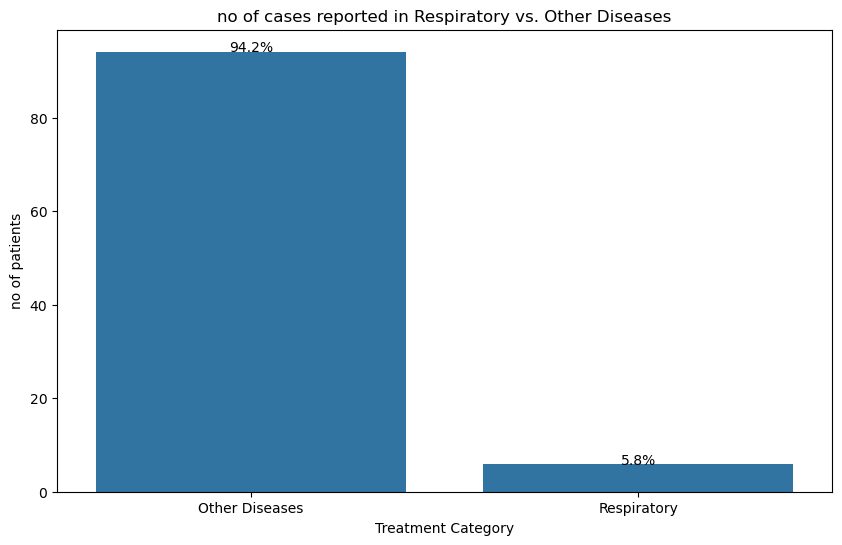

In [25]:
respiratory_treatments = ['level 4 airway endoscopy', 'level 5 airway endoscopy','level 2 pacemaker and similar procedures','level 3 pacemaker and similar procedures','level 4 pacemaker and similar procedures','level 1 icd and similar procedures','level 2 icd and similar procedures','level 2 electrophysiologic procedures',
       'level 3 electrophysiologic procedures',]

out_patient_2018_to_2022['treatment_category'] = out_patient_2018_to_2022['treatment'].apply(lambda x: 'Respiratory' if x in respiratory_treatments else 'Other Diseases')

category_counts = out_patient_2018_to_2022.groupby('treatment_category')['patient'].sum().reset_index()

category_counts['percentage'] = (category_counts['patient'] / category_counts['patient'].sum()) * 100

plt.figure(figsize=(10, 6))
barplot= sns.barplot(x='treatment_category', y='percentage', data=category_counts)
for index, row in category_counts.iterrows():
    barplot.text(index, row['percentage'], f"{row['percentage']:.1f}%", color='black', ha="center")

plt.xlabel('Treatment Category')
plt.ylabel('no of patients')
plt.title('no of cases reported in Respiratory vs. Other Diseases')
plt.show()

In the out patient segment respiratory cases contribute only 5.8% of over all disease cases in USA.

### Plotting to understand cost of treatment spent for respiratory related diseases vs other diseases

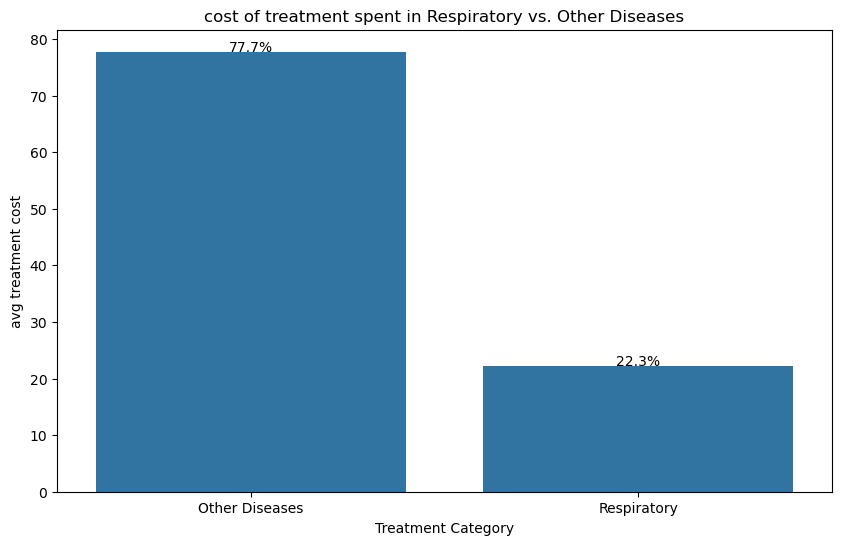

In [26]:
category_counts = out_patient_2018_to_2022.groupby('treatment_category')['cost'].sum().reset_index()

category_counts['percentage'] = (category_counts['cost'] / category_counts['cost'].sum()) * 100

plt.figure(figsize=(10, 6))
barplot= sns.barplot(x='treatment_category', y='percentage', data=category_counts)
for index, row in category_counts.iterrows():
    barplot.text(index, row['percentage'], f"{row['percentage']:.1f}%", color='black', ha="center")

plt.xlabel('Treatment Category')
plt.ylabel('avg treatment cost')
plt.title('cost of treatment spent in Respiratory vs. Other Diseases')
plt.show()

The cost of treatment contribution from respiratory treatment category is approximately 22%. Even though the respiratory disease cases contribution is nearly 6% the cost of treatment is much higher for the same.

Lets understand if the respiratory cases are higher in the higher populated states in USA. For that I will be considering top 5 populated states of US such as Texas, New york, California, Florida and Pennsylvania. lets plot the graph for respiratory cases reported in these 5 most populated states versus other states.

### Plotting to understand the respiratory disease cases reported in 5 most populated states of US vs others states

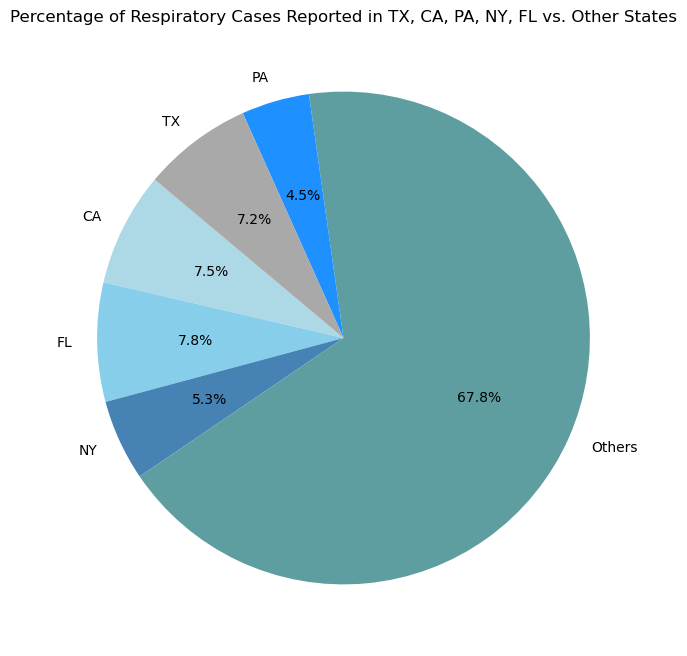

In [27]:

states_of_interest = ['TX', 'CA', 'PA', 'NY', 'FL']
out_patient_2018_to_2022['state'] = out_patient_2018_to_2022['state'].apply(lambda x: x if x in states_of_interest else 'Others')

respiratory_df = out_patient_2018_to_2022[out_patient_2018_to_2022['treatment'].isin(respiratory_treatments)]

state_counts = respiratory_df.groupby('state')['patient'].sum().reset_index()

state_counts['percentage'] = (state_counts['patient'] / state_counts['patient'].sum()) * 100

custom_palette = ["#ADD8E6", "#87CEEB", "#4682B4", "#5F9EA0", "#1E90FF", "#A9A9A9"] # Blue shades plus gray for 'Other States' 
plt.figure(figsize=(8, 8))
plt.pie(state_counts['percentage'], labels=state_counts['state'], autopct='%1.1f%%', startangle=140,colors=custom_palette )
plt.title('Percentage of Respiratory Cases Reported in TX, CA, PA, NY, FL vs. Other States')
plt.show()


This Graph shows that around 33% respiratory cases contribution is from these five most populated states of US. Out of these five states Florida, California and Texas reported the highest number of cases. Lets look at the cost of treatment for respiratory conditions for these 5 states.

### Plotting to understand the respiratory disease cases treatment cost in 5 most populated states of US vs others states

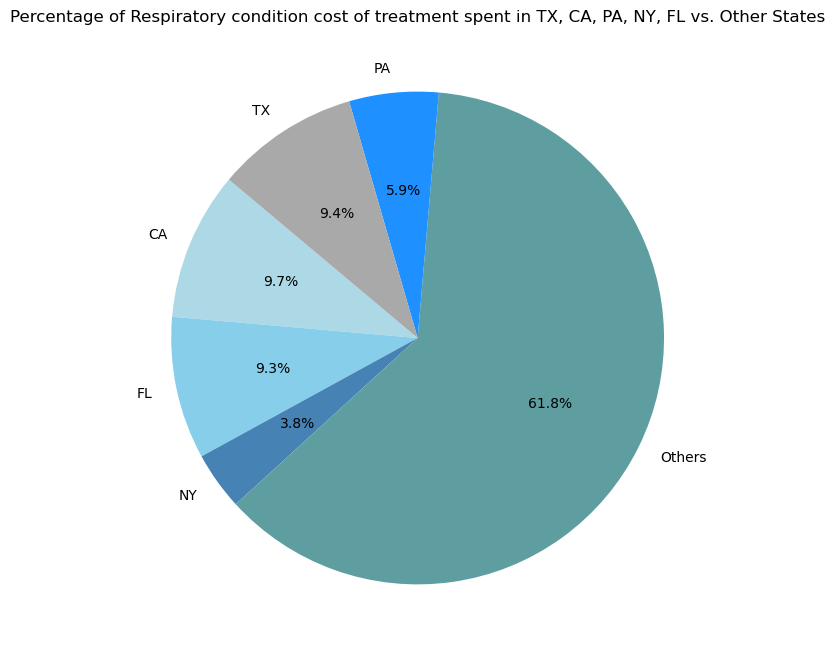

In [28]:
states_of_interest = ['TX', 'CA', 'PA', 'NY', 'FL']
out_patient_2018_to_2022['state'] = out_patient_2018_to_2022['state'].apply(lambda x: x if x in states_of_interest else 'Others')

respiratory_df = out_patient_2018_to_2022[out_patient_2018_to_2022['treatment'].isin(respiratory_treatments)]

state_counts = respiratory_df.groupby('state')['cost'].sum().reset_index()

state_counts['percentage'] = (state_counts['cost'] / state_counts['cost'].sum()) * 100

custom_palette = ["#ADD8E6", "#87CEEB", "#4682B4", "#5F9EA0", "#1E90FF", "#A9A9A9"]  
plt.figure(figsize=(8, 8))
plt.pie(state_counts['percentage'], labels=state_counts['state'], autopct='%1.1f%%', startangle=140,colors=custom_palette )
plt.title('Percentage of Respiratory condition cost of treatment spent in TX, CA, PA, NY, FL vs. Other States')
plt.show()

Nearly 40% of cost comes from these five states of US when compare to other states. As previously seen again Florida, California and Texas are the top contributor in terms of cost of treatment for respiratory conditions. However, even though Florida reported the top contributor in terms of number of cases but in terms of cost of treatment the California is taken over the Florida. Same goes with New York as well even the number of cases are higher the cost of treatment is lower.We need to see if this stand true for all the 5 years. Hence lets looks at 5 year trend analysis for number of respiratory cases as well as cost of treatment.

### Plotting to understand the 5 years trend for no of cases reported in most populated states of US

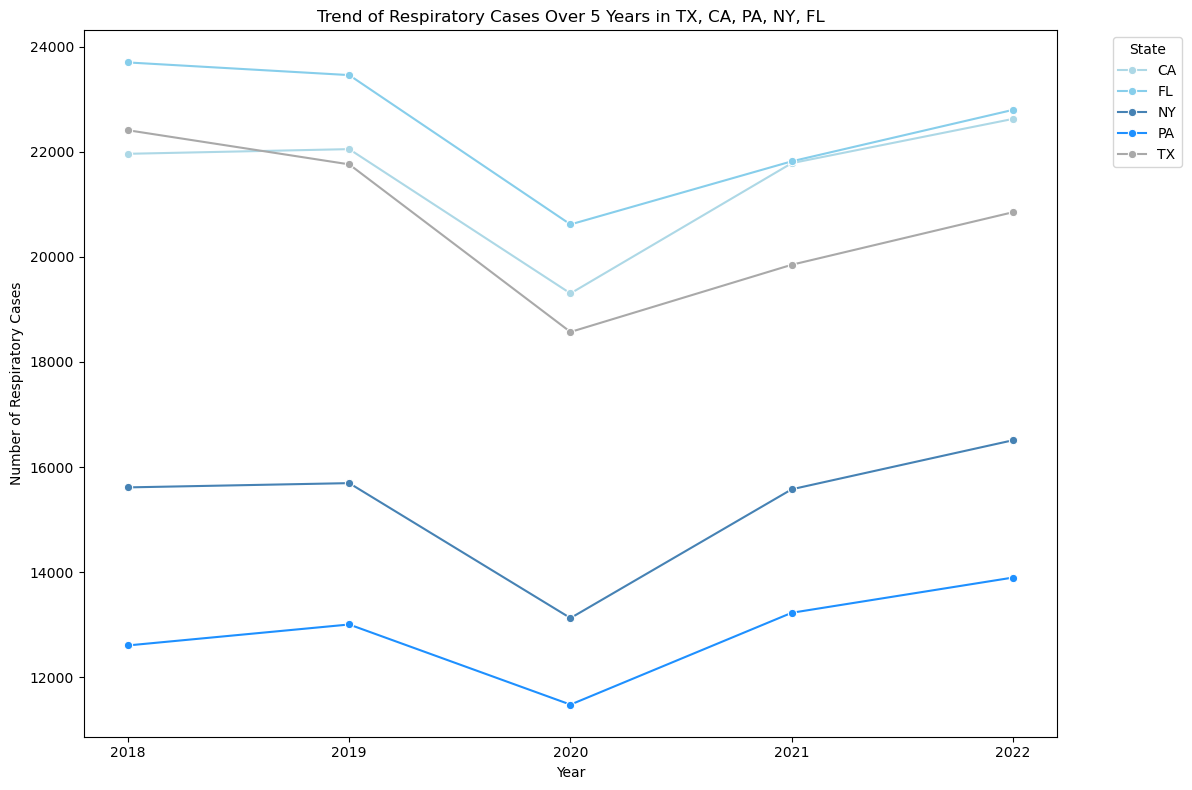

In [38]:
respiratory_df = respiratory_df[respiratory_df['state'].isin(states_of_interest)]

yearly_counts = respiratory_df.groupby(['year', 'state'])['patient'].sum().reset_index()

custom_palette = [ "#ADD8E6","#87CEEB", "#4682B4","#1E90FF", "#A9A9A9"]
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_counts, x='year', y='patient', hue='state', marker='o', palette= custom_palette )

plt.xlabel('Year')
plt.ylabel('Number of Respiratory Cases')
plt.title('Trend of Respiratory Cases Over 5 Years in TX, CA, PA, NY, FL')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()


As previously seen Florida reported the highest number of cases across all the 5 years followed by California and Texas. The least number of cases reported in Pennsylvania and Newyork is just little higher than Pennsylvania. Now lets plot cost of treatment graph to understand the cost of treatment trend for these 5 states for 5 years.

### Plotting to understand the 5 years trend on respiratory condition cost of treatment spent by 5 most populated states of US

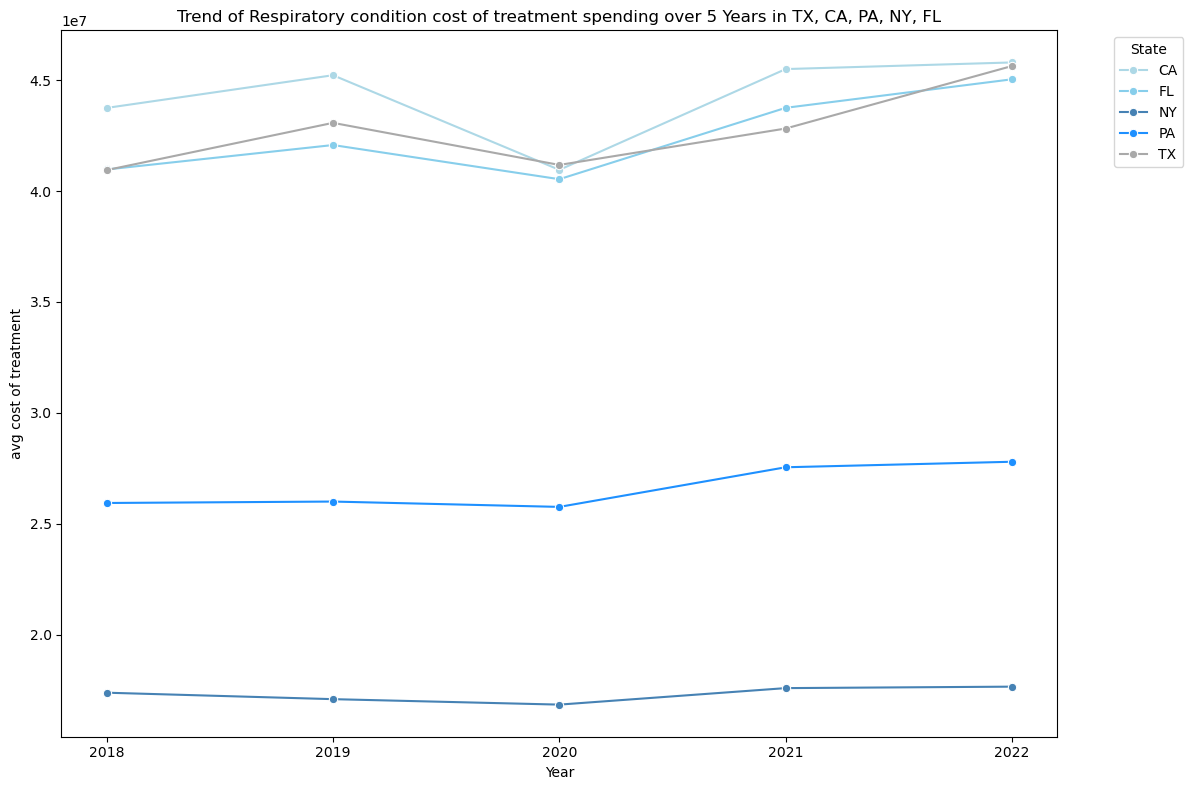

In [39]:
respiratory_df = respiratory_df[respiratory_df['state'].isin(states_of_interest)]

yearly_counts = respiratory_df.groupby(['year', 'state'])['cost'].sum().reset_index()

custom_palette = [ "#ADD8E6","#87CEEB", "#4682B4","#1E90FF", "#A9A9A9"]
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_counts, x='year', y='cost', hue='state', marker='o',palette=custom_palette)

plt.xlabel('Year')
plt.ylabel('avg cost of treatment')
plt.title('Trend of Respiratory condition cost of treatment spending over 5 Years in TX, CA, PA, NY, FL')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()


Across the five years, California consistently shows the highest cost of treatment, followed by Florida and Texas. However, despite New York reporting a higher number of cases compared to Pennsylvania, the cost of treatment in New York remains significantly lower than in the other four states.